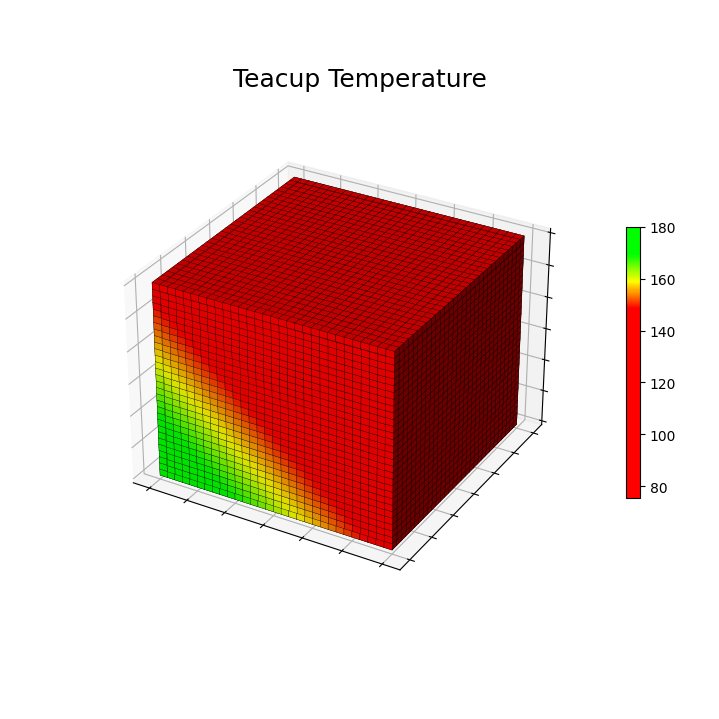

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import pysd

N_BINS = 256

# Load model and data
variable_to_plot = 'Teacup Temperature'
model = pysd.read_vensim("../../System Dynamics/Jupyter/PySD-Cookbook-master/source/models/Teacup/Teacup.mdl")
res = model.run(return_columns=[variable_to_plot])
min_value, max_value = 75.374001, 180.000000

def normalize_value(value, min_value, max_value):
    """Normalize a value based on a minimum and maximum."""
    return (value - min_value) / (max_value - min_value)

def map_value_to_color(value):
    """Map a normalized value to a color."""
    if value <= 0.4:
        return (1, 0, 0)  # Red
    elif value <= 0.7:
        return (1, 1, 0)  # Yellow
    else:
        return (0, 1, 0)  # Green

def get_segment_values(res, n_segments, variable_name):
    """Get values for each segment of the cube"""
    segment_length = len(res) // n_segments
    return [res.iloc[i * segment_length][variable_name] for i in range(n_segments + 1)]

# Colors for the colormap
colors = [map_value_to_color(normalize_value(val, min_value, max_value)) for val in get_segment_values(res, 10, variable_to_plot)]

# Plotting configuration
custom_cmap = LinearSegmentedColormap.from_list("custom_graduated_heatmap", colors, N=N_BINS)
axes = [30, 30, 30]
data = np.ones(axes, dtype=np.float32)
x, y, z = np.meshgrid(np.linspace(0, 5, axes[0]),
                      np.linspace(0, 5, axes[1]),
                      np.linspace(0, 5, axes[2]))
heatmap_data = x + y + z
heatmap_normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# 3D Plotting
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
voxels = ax.voxels(data, facecolors=custom_cmap(heatmap_normalized), alpha=1, edgecolor='k', linewidth=0.2)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# 2D Plotting
ax2d = fig.add_axes([0, 0, 1, 1], frameon=False)
ax2d.set_xticks([])
ax2d.set_yticks([])
ax2d.text(0.5, 0.9, f'{variable_to_plot}', fontsize=18, fontweight='normal', ha='center', va='center')

# Add Colorbar
sm = cm.ScalarMappable(cmap=custom_cmap.reversed(), norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.025, pad=0.1)

plt.show()